### Strike Zone Support Vector Machine

Use an SVM trained using a baseball dataset to find the decision boundary of the strike zone.

#### Import Modules

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#### Import Data

In [42]:
aaron_judge = pd.read_csv('judge.csv')

#### Explore Data

In [43]:
aaron_judge.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,FF,2017-09-30,95.7,-2.3581,5.9240,Aaron Judge,592450,608678,strikeout,swinging_strike,...,54.0129,0.0,0.0,0.0,1.0,0.0,0.0,NaN,53,3
1,FF,2017-09-30,96.3,-2.5577,5.9023,Aaron Judge,592450,608678,NaN,called_strike,...,54.1114,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,2
2,FF,2017-09-30,95.2,-2.3861,5.8346,Aaron Judge,592450,608678,NaN,called_strike,...,54.0285,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,1
3,FT,2017-09-30,93.4,4.2502,4.6506,Aaron Judge,592450,571901,walk,ball,...,54.7309,0.0,0.0,0.7,1.0,0.0,0.0,NaN,36,5
4,FT,2017-09-30,92.8,4.1144,4.4696,Aaron Judge,592450,571901,NaN,called_strike,...,54.5228,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36,4


In [44]:
aaron_judge.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'pos2_person_id', 'umpire',
       'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pos1_person_id',
       'pos2_person_id.1', 'pos3_person_id', 'pos4_person_id',
       'pos5_person_id', 'pos6_person_id', 'pos7_person_id', 'pos8_person_id',

In [45]:
aaron_judge.description.unique()

array(['swinging_strike', 'called_strike', 'ball', 'hit_into_play_score',
       'foul', 'blocked_ball', 'hit_into_play', 'hit_into_play_no_out',
       'swinging_strike_blocked', 'foul_tip', 'automatic_ball',
       'hit_by_pitch'], dtype=object)

In [46]:
aaron_judge.type.unique()

array(['S', 'B', 'X'], dtype=object)

#### Change String Values to Numerical Values

In [47]:
aaron_judge['type'] = aaron_judge['type'].map({'S':1, 'B':0})

In [48]:
aaron_judge.type

0       1.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
3431    0.0
3432    NaN
3433    0.0
3434    1.0
3435    1.0
Name: type, Length: 3436, dtype: float64

In [49]:
aaron_judge['plate_x']

0       1.0150
1       0.4546
2       0.0957
3       1.5161
4       0.0764
         ...  
3431    0.7390
3432   -0.4190
3433    0.5610
3434   -0.8030
3435   -0.2730
Name: plate_x, Length: 3436, dtype: float64

#### Drop Rows with NaN Values

In [50]:
aaron_judge = aaron_judge.dropna(subset = ['plate_x','plate_z','type'])

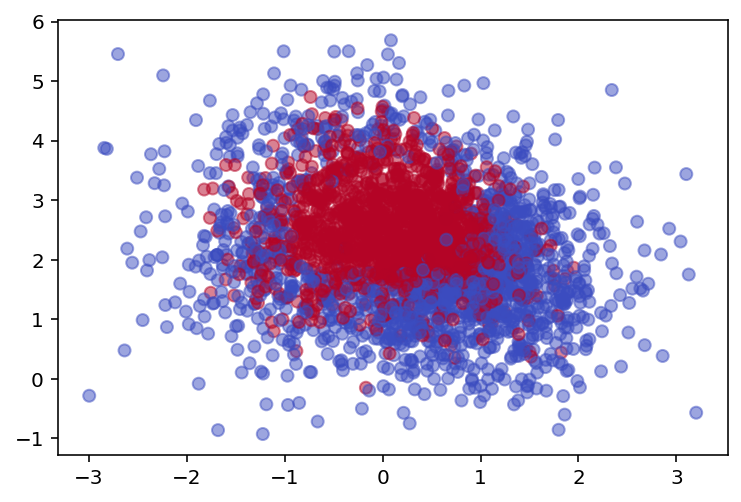

In [51]:
fig, ax = plt.subplots()
plt.scatter(aaron_judge.plate_x , aaron_judge.plate_z, c = aaron_judge.type, cmap = plt.cm.coolwarm, alpha=0.5)
plt.show()


#### Building the SVM 

In [52]:
aaron_judge_features = aaron_judge[['plate_x', 'plate_z']]
aaron_judge_labels = aaron_judge['type']

In [53]:
train_features, test_features, train_labels, test_labels =\
train_test_split(aaron_judge_features, aaron_judge_labels, random_state =1)

In [54]:
classifier = SVC()

In [55]:
classifier.fit(train_features, train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Plotting the Pitches

In [56]:
def make_meshgrid(ax, h=.02):
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def draw_boundary(ax, clf):
    xx, yy = make_meshgrid(ax)
    return plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.5)

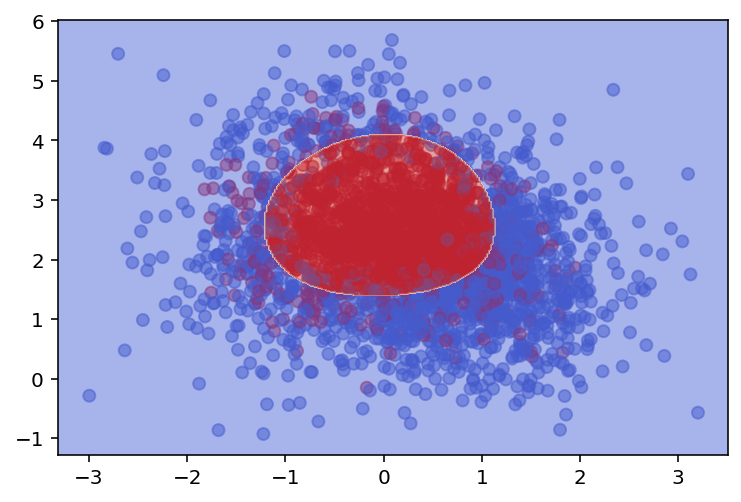

In [39]:
fig, ax = plt.subplots()
plt.scatter(aaron_judge.plate_x , aaron_judge.plate_z, c = aaron_judge.type, cmap = plt.cm.coolwarm, alpha=0.5)
draw_boundary(ax, classifier)
plt.show()

In [40]:
print("Training set score: {:.3f}".format(classifier.score(train_features, train_labels)))
print("Test set score: {:.3f}".format(classifier.score(test_features, test_labels)))

Training set score: 0.832
Test set score: 0.837
